### Data Exploration and Preprocessing


In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\ISMAIL\Downloads\ai4i+2020+predictive+maintenance+dataset\ai4i2020.csv")

# Check for missing values
missing_values = data.isnull().sum()

# Checking for the data types
data_types = data.dtypes

# summary statistics
summary_stats = data.describe()



In [2]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# Dropping the 'Product ID' column
data.drop('Product ID', axis=1, inplace=True)


print(data.head())


   UDI Type  Air temperature [K]  Process temperature [K]  \
0    1    M                298.1                    308.6   
1    2    L                298.2                    308.7   
2    3    L                298.1                    308.5   
3    4    L                298.2                    308.6   
4    5    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  


### Feature Engineering

Create a feature that represents the difference between 'process temperature [K]' and 'air temperature [K]'. This feature can help identify cases where heat dissipation failure (HDF) occurs.

Calculate the 'power' feature as mentioned in the dataset description ('torque [Nm]' * 'rotational speed [rpm]'). This can be a critical feature for identifying power failures (PWF).

Create a feature that represents the ratio of 'torque [Nm]' to 'tool wear [min]'. This can help capture cases where overstrain failure (OSF) occurs.

Normalize 'tool wear [min]' based on the product quality variants (H/M/L). Since different product variants add different amounts of tool wear, this normalization can help in feature consistency.  

Create binary flags for each failure mode (TWF, HDF, PWF, OSF, RNF) based on the given criteria. These binary flags will indicate whether each failure mode occurred for each data point.  

Create an interaction feature that multiplies 'Power' and 'torque [Nm]' to capture the interaction between these variables.


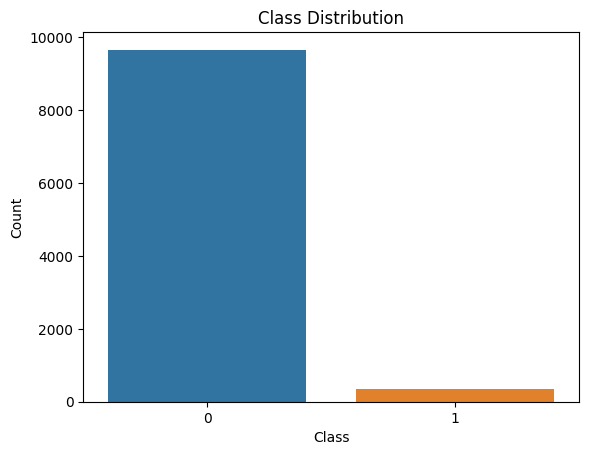

Machine failure
0    0.9661
1    0.0339
Name: count, dtype: float64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the classes
class_counts = data['Machine failure'].value_counts()

# Visualize the class distribution
sns.countplot(x='Machine failure', data=data)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Calculating class ratios to check for data distribution in our target variable
class_ratios = class_counts / class_counts.sum()
print(class_ratios)


In [5]:
# Temperature Difference feature
data['TemperatureDelta'] = data['Process temperature [K]'] - data['Air temperature [K]']

# Power feature
data['Power'] = data['Torque [Nm]'] * (2 * 3.14159265359 * data['Rotational speed [rpm]'] / 60)  # Convert rpm to rad/s




# Tool Wear Normalization feature
data['NormalizedToolWear'] = data.apply(lambda row: row['Tool wear [min]'] / 5 if row['Type'] == 'H'
                                         else (row['Tool wear [min]'] / 3 if row['Type'] == 'M' else row['Tool wear [min]'] / 2), axis=1)



# Interaction Feature: Power_Torque
data['Power_Torque'] = data['Power'] * data['Torque [Nm]']
 
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'Type' column
data['Type_encoded'] = label_encoder.fit_transform(data['Type'])

# Display the first few rows to check the encoding
print(data[['Type', 'Type_encoded']].head())


  Type  Type_encoded
0    M             2
1    L             1
2    L             1
3    L             1
4    L             1


### Data Visualization

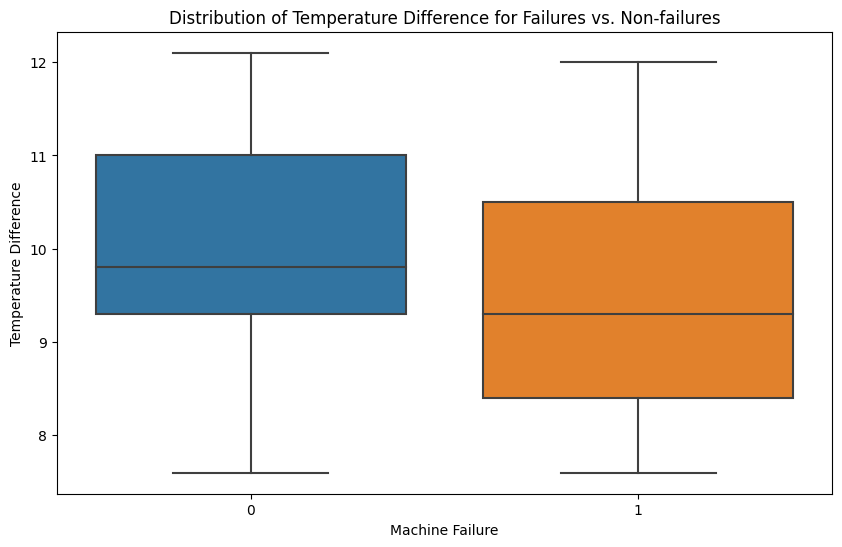

In [6]:
##Visual for the distribution of 'TemperatureDelta' for both failed and non-failed
#processes. This can help us understand if temperature difference is a significant 
#factor in machine failures.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Machine failure', y='TemperatureDelta', data=data)
plt.title('Distribution of Temperature Difference for Failures vs. Non-failures')
plt.xlabel('Machine Failure')
plt.ylabel('Temperature Difference')
plt.show()


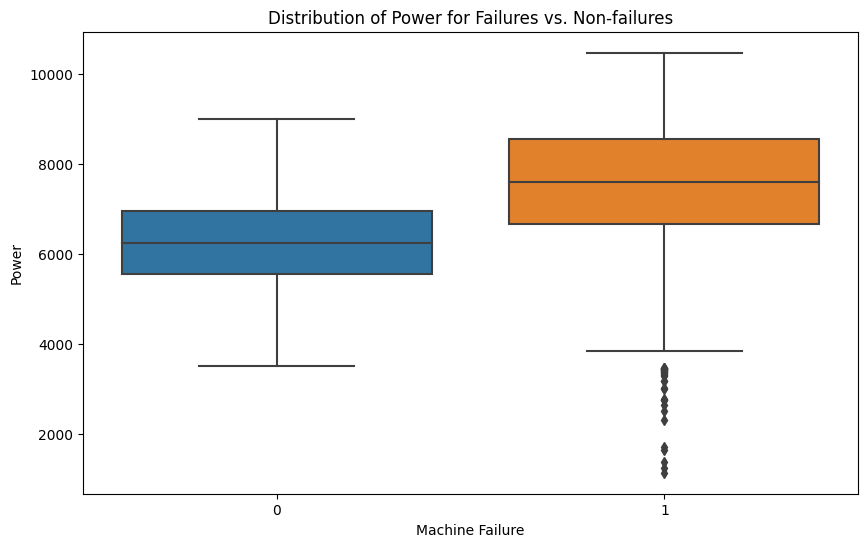

In [7]:
## Visual for the distribution of 'Power' for both failed and non-failed processes to 
#understand its impact on machine failures.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Machine failure', y='Power', data=data)
plt.title('Distribution of Power for Failures vs. Non-failures')
plt.xlabel('Machine Failure')
plt.ylabel('Power')
plt.show()


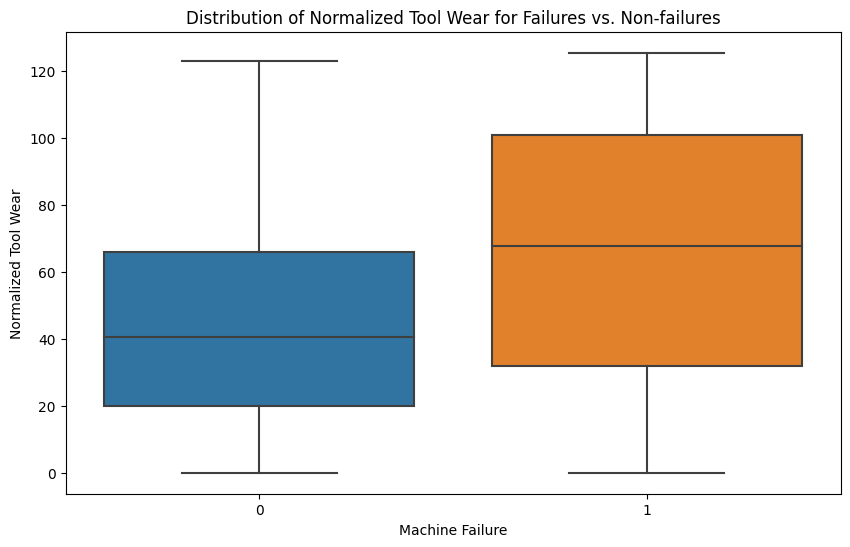

In [8]:
##Visual for the distribution of 'NormalizedToolWear' for both failed and 
#non-failed processes.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Machine failure', y='NormalizedToolWear', data=data)
plt.title('Distribution of Normalized Tool Wear for Failures vs. Non-failures')
plt.xlabel('Machine Failure')
plt.ylabel('Normalized Tool Wear')
plt.show()


In [9]:
summary_stats = data.describe()
print(summary_stats)

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

### Data Splitting

In [10]:

from sklearn.model_selection import train_test_split
# Drop the 'Type' column from the dataset
data = data.drop('Type', axis=1)
# Define your features (X) and target variable (y)
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


### Model Training and Evaluation

In [11]:
summary_stats = data.describe()
print(summary_stats)

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

Model: Logistic Regression
Accuracy: 0.9990
Precision: 1.0000
Recall: 0.9672
F1 Score: 0.9833
ROC AUC: 0.9836


Model: Support Vector Machine (SVM)
Accuracy: 0.9990
Precision: 1.0000
Recall: 0.9672
F1 Score: 0.9833
ROC AUC: 0.9836


Model: Random Forest Classifier
Accuracy: 0.9985
Precision: 0.9833
Recall: 0.9672
F1 Score: 0.9752
ROC AUC: 0.9833


Model: Gradient Boosting (XGBoost)
Accuracy: 0.9985
Precision: 0.9833
Recall: 0.9672
F1 Score: 0.9752
ROC AUC: 0.9833


Model: Decision Tree Classifier
Accuracy: 0.9920
Precision: 0.8082
Recall: 0.9672
F1 Score: 0.8806
ROC AUC: 0.9800




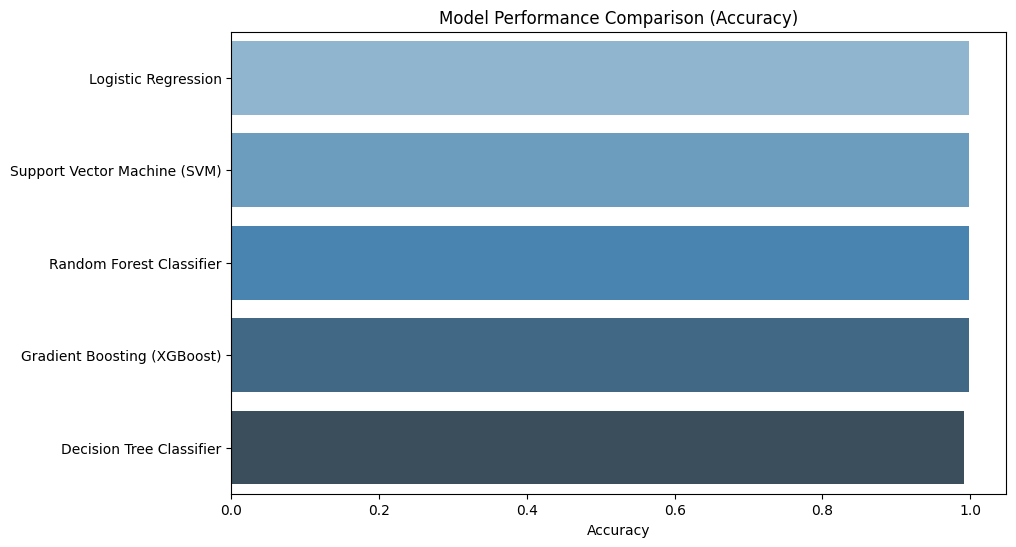

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # Added

# Define a dictionary to store model performances
model_performances = {}

# Define a list of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Machine (SVM)': SVC(),
    'Gradient Boosting (XGBoost)': xgb.XGBClassifier(),
}

# Define your features (X) and target variable (y)
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SMOTE class
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model on the resampled data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store the model's performance in the dictionary
    model_performances[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Sort models by accuracy
sorted_models = {k: v for k, v in sorted(model_performances.items(), key=lambda item: item[1]['Accuracy'], reverse=True)}

# Print the model performances
for model, performance in sorted_models.items():
    print(f"Model: {model}")
    print(f"Accuracy: {performance['Accuracy']:.4f}")
    print(f"Precision: {performance['Precision']:.4f}")
    print(f"Recall: {performance['Recall']:.4f}")
    print(f"F1 Score: {performance['F1 Score']:.4f}")
    print(f"ROC AUC: {performance['ROC AUC']:.4f}")
    print("\n")

# Visualize model performances (optional)
plt.figure(figsize=(10, 6))
model_names = list(sorted_models.keys())
accuracy_scores = [performance['Accuracy'] for performance in sorted_models.values()]
sns.barplot(x=accuracy_scores, y=model_names, palette="Blues_d")
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison (Accuracy)')
plt.show()


Model: Gradient Boosting (XGBoost)
Accuracy: 0.9880
Precision: 0.7342
Recall: 0.9508
F1 Score: 0.8286
ROC AUC: 0.9700


Model: Random Forest Classifier
Accuracy: 0.9820
Precision: 0.6374
Recall: 0.9508
F1 Score: 0.7632
ROC AUC: 0.9669


Model: Decision Tree Classifier
Accuracy: 0.9610
Precision: 0.4274
Recall: 0.8197
F1 Score: 0.5618
ROC AUC: 0.8926


Model: Support Vector Machine (SVM)
Accuracy: 0.9535
Precision: 0.3919
Recall: 0.9508
F1 Score: 0.5550
ROC AUC: 0.9522


Model: Logistic Regression
Accuracy: 0.9420
Precision: 0.3392
Recall: 0.9508
F1 Score: 0.5000
ROC AUC: 0.9463




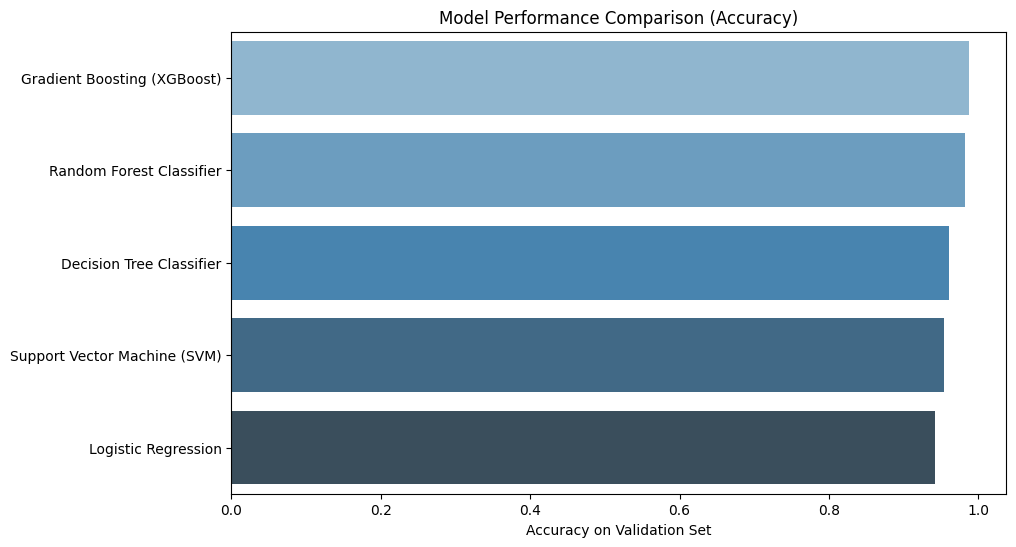

Performance on Test Set (Best Model):
Accuracy: 0.9945
Precision: 0.8701
Recall: 0.9853
F1 Score: 0.9241
ROC AUC: 0.9901


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # Added for SMOTE



# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to address class imbalance in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the validation and test data using the same scaler
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# Define a dictionary to store model performances
model_performances = {}

# Define a list of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Machine (SVM)': SVC(),
    'Gradient Boosting (XGBoost)': xgb.XGBClassifier(),
}

# Train and evaluate each model on the training and validation sets
for model_name, model in models.items():
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train_resampled)

    # Make predictions on the validation set
    y_validation_pred = model.predict(X_validation_scaled)

    # Evaluate the model's performance on the validation set
    accuracy = accuracy_score(y_validation, y_validation_pred)
    precision = precision_score(y_validation, y_validation_pred)
    recall = recall_score(y_validation, y_validation_pred)
    f1 = f1_score(y_validation, y_validation_pred)
    roc_auc = roc_auc_score(y_validation, y_validation_pred)

    # Store the model's performance in the dictionary
    model_performances[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Sort models by accuracy on the validation set
sorted_models = {k: v for k, v in sorted(model_performances.items(), key=lambda item: item[1]['Accuracy'], reverse=True)}

# Print the model performances on the validation set
for model, performance in sorted_models.items():
    print(f"Model: {model}")
    print(f"Accuracy: {performance['Accuracy']:.4f}")
    print(f"Precision: {performance['Precision']:.4f}")
    print(f"Recall: {performance['Recall']:.4f}")
    print(f"F1 Score: {performance['F1 Score']:.4f}")
    print(f"ROC AUC: {performance['ROC AUC']:.4f}")
    print("\n")

# Visualize model performances on the validation set (optional)
plt.figure(figsize=(10, 6))
model_names = list(sorted_models.keys())
accuracy_scores = [performance['Accuracy'] for performance in sorted_models.values()]
sns.barplot(x=accuracy_scores, y=model_names, palette="Blues_d")
plt.xlabel('Accuracy on Validation Set')
plt.title('Model Performance Comparison (Accuracy)')
plt.show()

# Now, select the best model based on validation performance and evaluate it on the test set
best_model_name = list(sorted_models.keys())[0]  # Choose the best model (e.g., the one with the highest accuracy)
best_model = models[best_model_name]

# Train the best model on the combined training and validation data
X_train_valid_scaled = np.vstack((X_train_scaled, X_validation_scaled))
y_train_valid_resampled = np.concatenate((y_train_resampled, y_validation))

best_model.fit(X_train_valid_scaled, y_train_valid_resampled)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the best model's performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the best model's performance on the test set
print("Performance on Test Set (Best Model):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")


### Saving My trained Model


In [15]:
import joblib

# Save the trained model
joblib.dump(best_model, 'your_model.pkl')


['your_model.pkl']